In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Machine learning models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
# Read and explore data
df = pd.read_csv("clean_cafe_sales.csv")
df.head()

,Unnamed: 0,Quantity,Price Per Unit,Total Spent,is_imputed,year,month,day,weekday,is_weekend,...,Item_Tea,Item_Other,Payment Method_Credit Card,Payment Method_Digital Wallet,Payment Method_Not Recorded,Location_Takeaway,Location_Not Recorded,season_Spring,season_Summer,season_Winter
0,0,2,2.0,4.0,False,2023,9,8,4,0,...,False,False,True,False,False,True,False,False,False,False
1,1,4,3.0,12.0,False,2023,5,16,1,0,...,False,False,False,False,False,False,False,True,False,False
2,2,4,1.0,4.0,False,2023,7,19,2,0,...,False,False,True,False,False,False,False,False,True,False
3,3,2,5.0,10.0,False,2023,4,27,3,0,...,False,False,False,False,True,False,True,True,False,False
4,4,2,2.0,4.0,False,2023,6,11,6,1,...,False,False,False,True,False,False,False,False,True,False


In [3]:
df.shape

(9280, 27)

In [4]:
df.columns

Index(['Unnamed: 0', 'Quantity', 'Price Per Unit', 'Total Spent', 'is_imputed',
       'year', 'month', 'day', 'weekday', 'is_weekend', 'Total Spent Log',
       'Item_Coffee', 'Item_Cookie', 'Item_Juice', 'Item_Salad',
       'Item_Sandwich', 'Item_Smoothie', 'Item_Tea', 'Item_Other',
       'Payment Method_Credit Card', 'Payment Method_Digital Wallet',
       'Payment Method_Not Recorded', 'Location_Takeaway',
       'Location_Not Recorded', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

In [5]:
# Delete column Unnamed: 0 because it's just an old Index
if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Quantity                       9280 non-null   int64  
 1   Price Per Unit                 9280 non-null   float64
 2   Total Spent                    9280 non-null   float64
 3   is_imputed                     9280 non-null   bool   
 4   year                           9280 non-null   int64  
 5   month                          9280 non-null   int64  
 6   day                            9280 non-null   int64  
 7   weekday                        9280 non-null   int64  
 8   is_weekend                     9280 non-null   int64  
 9   Total Spent Log                9280 non-null   float64
 10  Item_Coffee                    9280 non-null   bool   
 11  Item_Cookie                    9280 non-null   bool   
 12  Item_Juice                     9280 non-null   b

In [6]:
# Missing values
df.isna().sum()

Quantity                         0
Price Per Unit                   0
Total Spent                      0
is_imputed                       0
year                             0
month                            0
day                              0
weekday                          0
is_weekend                       0
Total Spent Log                  0
Item_Coffee                      0
Item_Cookie                      0
Item_Juice                       0
Item_Salad                       0
Item_Sandwich                    0
Item_Smoothie                    0
Item_Tea                         0
Item_Other                       0
Payment Method_Credit Card       0
Payment Method_Digital Wallet    0
Payment Method_Not Recorded      0
Location_Takeaway                0
Location_Not Recorded            0
season_Spring                    0
season_Summer                    0
season_Winter                    0
dtype: int64

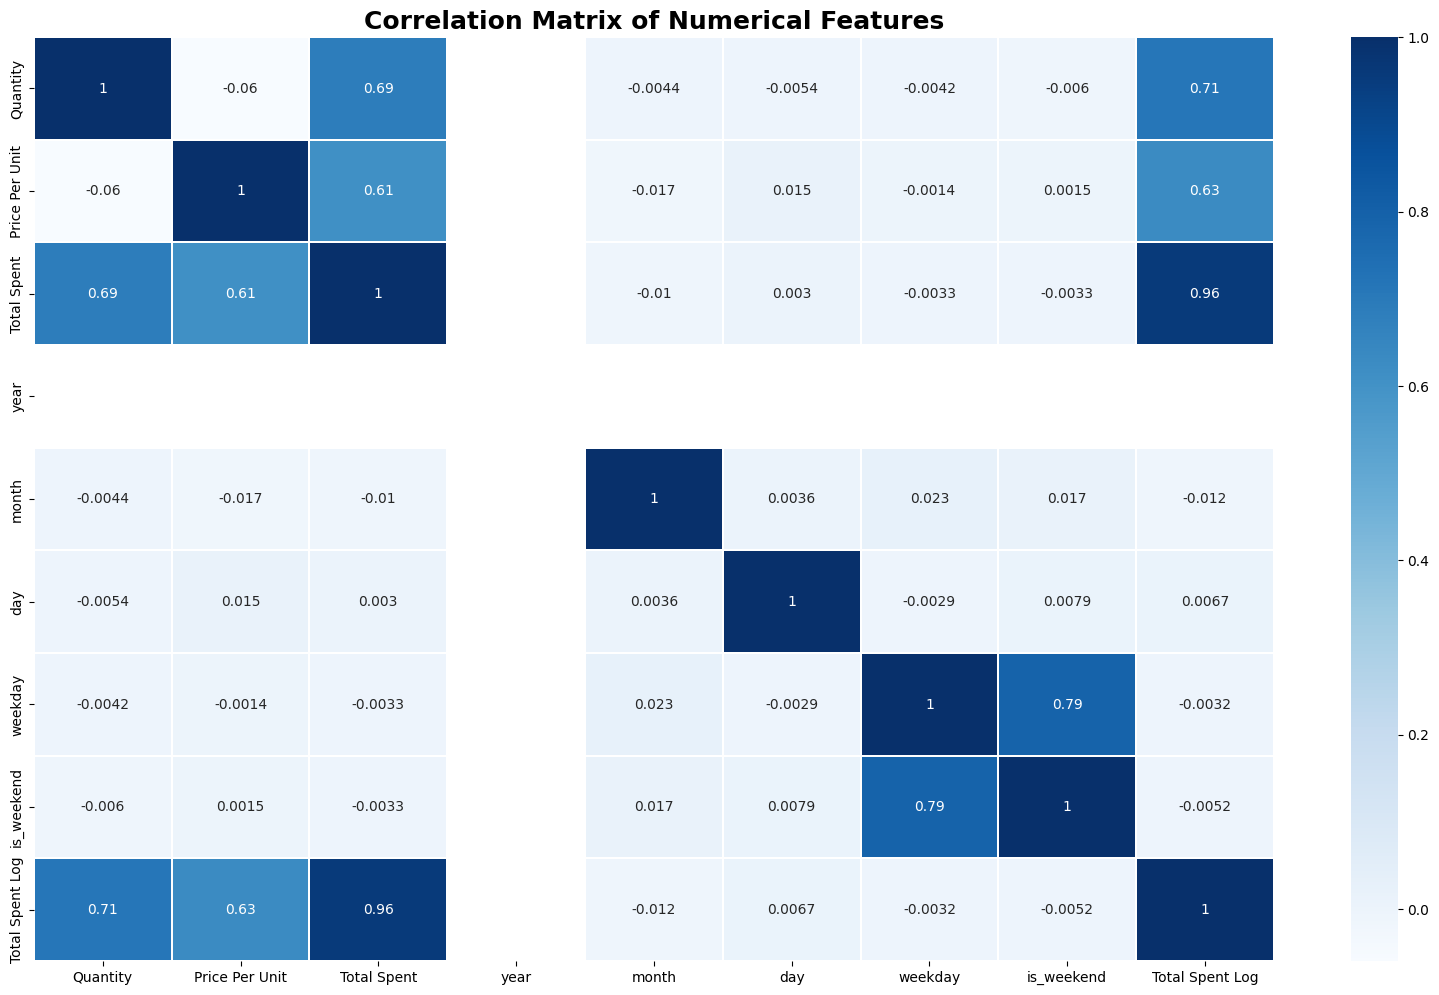

In [7]:
# Correlation Matrix
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20, 12))
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap="Blues", linewidths=0.3)
plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight="bold")
plt.show()


In [8]:
X = df.drop(columns=['Total Spent', 'Total Spent Log'])
y = df['Total Spent Log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("---")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X shape: (9280, 24)
y shape: (9280,)
---
X_train: (6496, 24)
X_test : (2784, 24)
y_train: (6496,)
y_test : (2784,)


In [9]:
# Scaling
cols_to_scale = ['Quantity', 'Price Per Unit']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("📌 X_train_scaled and X_test_scaled (Pandas DataFrames) are ready.")

📌 X_train_scaled and X_test_scaled (Pandas DataFrames) are ready.


In [10]:
# Use the REGRESSION version of the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) 

# Fit using the scaled training data
rf_reg.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_rf = rf_reg.predict(X_test_scaled)

print("--- Random Forest Regressor Performance ---")
print(f"R-squared: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")

--- Random Forest Regressor Performance ---
R-squared: 0.9975
Root Mean Squared Error (RMSE): 0.0308


In [11]:
# Instantiate the XGBoost Regressor
xgb_reg = XGBRegressor(
    learning_rate=0.1, 
    max_depth=6, 
    n_estimators=300, 
    random_state=42, 
    n_jobs=-1
) 

# Fit the model (using your scaled data)
xgb_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_reg.predict(X_test_scaled)

print("--- XGBoost Regressor Performance ---")
print(f"R-squared: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")

--- XGBoost Regressor Performance ---
R-squared: 0.9973
Root Mean Squared Error (RMSE): 0.0324


The near-perfect $R^2$ score ($\approx 0.99$) confirms that the model correctly captures the deterministic relationship
$Total = Quantity \times Price$.
This acts as a data-integrity validation step before evaluating performance on features that reflect non-mathematical patterns.

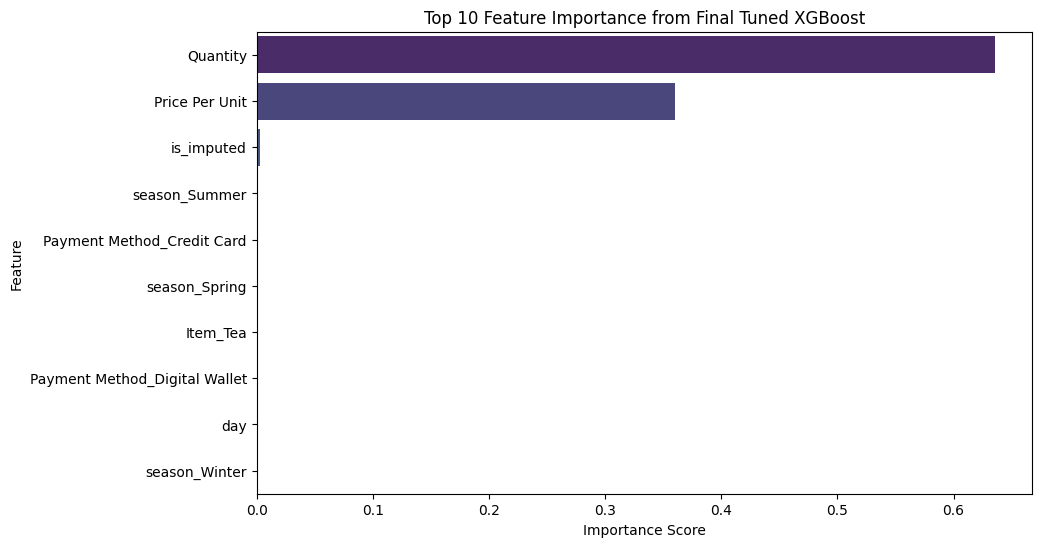

Top 10 Most Important Features:
 Quantity                         0.635477
Price Per Unit                   0.360361
is_imputed                       0.002674
season_Summer                    0.000466
Payment Method_Credit Card       0.000242
season_Spring                    0.000161
Item_Tea                         0.000114
Payment Method_Digital Wallet    0.000093
day                              0.000078
season_Winter                    0.000077
dtype: float32


In [12]:
# Get feature importance scores from the final model
feature_importances = pd.Series(
xgb_reg.feature_importances_,
index=X_train_scaled.columns
).sort_values(ascending=False)

# Select the top 10 features for reporting
top_10 = feature_importances.head(10)

# Visualize the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, hue=top_10.index, palette="viridis", legend=False)
plt.title('Top 10 Feature Importance from Final Tuned XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("Top 10 Most Important Features:\n", top_10)